In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 #this will import openCV2

In [5]:
#we will use Haar Cascade Clisifier to detect the face in an image.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
#Create a function that takes input as a gray_scale image(called gray) and also original image(called frame)
def facedetect(gray,frame):
    faces = face_cascade.detectMultiScale(gray,1.3,5) # to locate one or several faces in the image
    for(x,y,w,h) in faces: #for each detect faces in an image
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) #it will create a coloured ounding box in the image
        roi_gray = gray[y:y+h,x:x+w] #get the region of intrest in the grayscale image
        roi_color = frame[y:y+h,x:x+w]# get the region of interest in colored image
    return frame #we return image with rectangle on detected face

In [9]:
#ScreenShot of Face
def screenshot():
    cam = cv2.VideoCapture(0)
    cv2.namedWindow("Capture_Image")
    while True:
        ret,frame = cam.read()
        if not ret:
            print('Failed to Grab Frame')
            break
        cv2.imshow("Capture_Image",frame)
        k = cv2.waitKey(1)
        if k%256 == 27:
        # ESC pressed
            print("Escape hit, closing...")
            break
        elif k%256 == 32:
        # SPACE pressed
            img_name = "Capture_Image.jpg"
            cv2.imwrite(img_name, frame)
            print("Picture Captured!")
    cam.release()
    cv2.destroyAllWindows()
    return frame

In [11]:
#real-time video capture 
video_capture = cv2.VideoCapture(0,cv2.CAP_DSHOW)
while video_capture.isOpened():
    _, img= video_capture.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frame = facedetect(gray,img)
    
    cv2.imshow('img',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        video_capture.release()
        cv2.destroyAllWindows()
        break

Picture Captured!
Escape hit, closing...


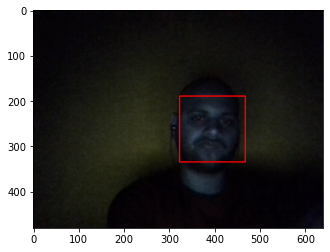

In [5]:
#main code
img = screenshot()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
frame = facedetect(gray,img)
#cv2.imshow('img',frame)
imgplot = plt.imshow(img)
plt.show()